<a href="https://colab.research.google.com/github/ccaballeroh/InferenciaCausal_A22/blob/main/code/assignments/Causal_Inference_A22_Ex01_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta celda escribe tu **Elizabeth López Lozada** y tu **DCC** (ESCOM, MCC, MCIC o DCC)

# Análisis de salarios entre hombres y mujeres

Supongamos que trabajamos como _data scientists_ en una empresa y se nos proporciona un conjunto de datos sobre los salarios entre hombres y mujeres en la compañía.

Con este conjunto de datos se nos pide contestar **¿cuál es la brecha de paga entre hombres y mujeres en la empresa?**

## Preliminares

Importa los módulos/paquetes necesarios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm import tqdm

Definición de funciones auxiliares usadas.

In [2]:
def generate_data(**kwargs):
  raise NotImplementedError

def read_data(**kwargs):
  csv_filename = kwargs["csv_filename"]
  return pd.read_csv(csv_filename, index_col=0)

La variable `ENV` debe tener valor `"HW"` cuando está en modo de tarea.

In [3]:
ENV = "HW"

In [4]:
get_data = read_data if ENV == "HW" else generate_data

## Inicio

Lee los datos desde el archivo `ex_01_wages.csv` con la función `read_data` definida arriba.

In [5]:
kwargs = {
    "csv_filename": "https://raw.githubusercontent.com/ccaballeroh/InferenciaCausal_A22/main/data/ex_01_wages.csv"
}

data = get_data(**kwargs)

if not ENV == "HW":
  data.to_csv("ex_01_wages.csv")

## Análisis exploratorio de datos

Veamos las primeras líneas del conjunto de datos guardado en el DataFrame llamado `data`.

In [6]:
# Llama el método `head()` del DataFrame
data.head()

,sexo,puesto,salario
index,,,
0,Hombre,No gerencial,24092.767040
1,Mujer,No gerencial,25574.011864
2,Hombre,Gerencial,39051.930008
3,Mujer,No gerencial,26058.226921
4,Hombre,Gerencial,44688.832593


Imprime el tipo de dato de las columnas de `data`.

In [7]:
# Llama el atributo `dtypes` del DataFrame
data.dtypes

sexo        object
puesto      object
salario    float64
dtype: object

Imprime el resumen del conjunto de datos.

In [8]:
# Llama al método `describe()` con el argumento `include=['object', 'float', 'int]`
data.describe()

,salario
count,200.000000
mean,35155.418105
std,8506.795221
min,17037.452191
25%,28699.515533
50%,33567.270374
75%,40003.413391
max,67095.395958


Haz una gráfica de caja de `salario` por `sexo`.

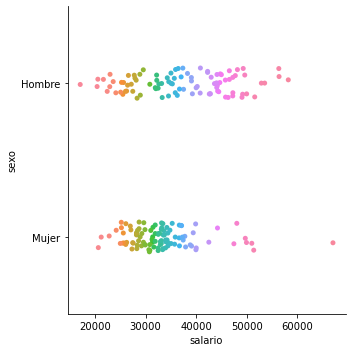

In [9]:
# Utiliza `catplot` de Seaborn
sns.catplot(x="salario", y="sexo", hue="salario", data=data)

¿Qué opinas sobre si hay o no diferencia salarial entre hombres y mujeres?

**Tu respuesta:**
Se puede observar que la distribuciónn salarial de los hombres es más variado (de bajos a altos), mientras que la distribución salarial que presenta la muestra de de las mujeres se concentra entre salarios bajos y medios. Son pocos los casos donde los salarios son altos, y sin embargo, en la mayoría de los casos son menores a los salarios de la muestra masculina.

Ahora, haz una gráfica de caja de `salario` por `sexo` separando por la tercera variable `puesto`.

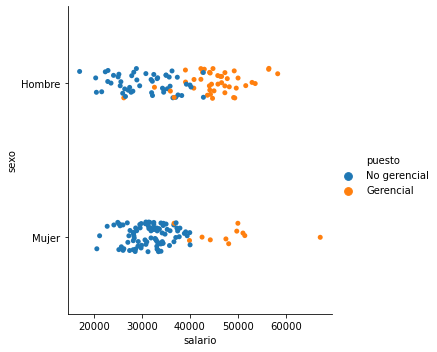

In [10]:
# Utiliza `catplot`
sns.catplot(x="salario", y="sexo", hue="puesto", data=data)

¿Cambió tu opinión? ¿Hay diferencia entre hombres y mujeres comparando por el mismo tipo de puesto?

**Tu respuesta:**
Se sigue observando que los salarios de las mujeres son más bajos que los salarios de los hombres en puestos gerenciales, excepto por un caso que destaca del resto.

Ahora, haz una gráfica categórica de tipo `swarm` usando `catplot` de Seaborn. En el eje de las equis coloca el `puesto`; en el de las ye, `salario` y separa por `sexo`. 

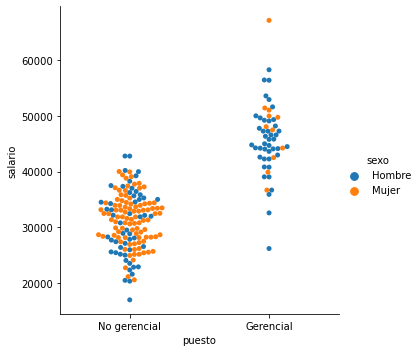

In [11]:
# Tu código

sns.catplot(x="puesto", y="salario", hue="sexo", kind="swarm", data=data)

¿Es mucha la diferencia en salario entre gerentes y no gerentes?

**Tu respuesta:**
En algunos casos la diferencia de salario es amplia pero no es una regla general que aplica para todos los casos.

Ahora haz la misma gráfica, pero invierte las variables para las equis y el _hue_.

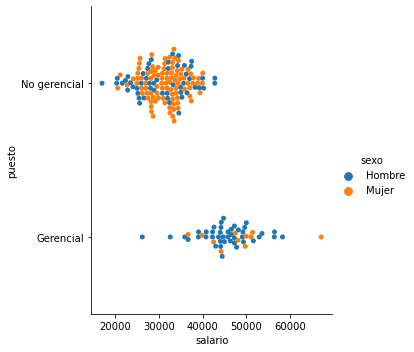

In [12]:
# Tu código
sns.catplot(x="salario", y="puesto", hue="sexo", kind="swarm", data=data)

¿Hay más o menos mujeres que hombres en puestos altos? ¿Y en puestos bajos?

**Tu respuesta:**
La mayor parte de los puestos cubiertos por mujeres son en áreas "No Gerenciales", mientras que son escasos los puestos en que una mujer toma un puesto "Gerencial"

Genera una tabla de contingencia para el salario promedio y otra para el número total de personas en cada combinación de categorías.

In [13]:
# Utiliza `crosstab` de Pandas con la función de agregación `mean` de Numpy
pd.crosstab(data.puesto, data.sexo, values=data.salario, aggfunc=np.mean)

sexo,Hombre,Mujer
puesto,,
Gerencial,45342.802726,48006.103590
No gerencial,30692.538241,31460.255062


In [14]:
# Utiliza `crosstab` de Pandas. Pasa `True` al parámetro `margins`

pd.crosstab(data.puesto, data.sexo, margins=True)

sexo,Hombre,Mujer,All
puesto,,,
Gerencial,43,11,54
No gerencial,52,94,146
All,95,105,200


## Pregunta de análisis

Para este conjunto de datos, se nos pide determinar la brecha salarial entre hombres y mujeres en la empresa en la que se recolectaron estos datos.

- Antes de continuar, usa las tablas de contingencia anteriores para intentar contestar la pregunta.

**Tu respuesta:**

Si se ocupa la tabla de contingencia que muestra los salarios promedio, se podría decir que los salarios promedio de las mujeres son superiores al de los hombres. Sin embargo, se están tomando en cuenta todos los datos de entrada sin hacer una limpieza previa, esto puede generar errores. Por ejemplo, si se observa la gráfica que despliega el salario, se nota un punto muy alejado -correspondiente al de una mujer gerente- que apunta aún salario muy superior al de los demás puntos. Este tipo de información puede generar un sesgo que no se está tomando en cuenta durante el cálculo de los salarios promedio. Por tanto, se requiere de un análisis más profundo para determinar la brecha salarial.

## Análisis guiado

## 1. Calcula el salario promedio de mujeres y hombres

- Calcula el salario promedio de las mujeres
- Calcula el salario promedio de los hombres
- Saca la diferencia

¿Quién gana más?

In [15]:
## tu código

promedio_mujeres = data.where(data['sexo'] == 'Mujer')['salario'].mean()
promedio_hombres = data.where(data['sexo'] == 'Hombre')['salario'].mean()

##

print(f"""
Las mujeres ganan en promedio: ${promedio_mujeres:,.2f}
Los hombres ganan en promedio: ${promedio_hombres:,.2f}

La diferencia es ${promedio_mujeres - promedio_hombres:,.2f}
""")


Las mujeres ganan en promedio: $33,193.63
Los hombres ganan en promedio: $37,323.71

La diferencia es $-4,130.08



## 2. Ahora compara por estratos

- Compara por categoría `puesto` de forma separada.

- ¿Ahora, cuál es la diferencia salarial en cada categoría?

- ¿Quién gana más en cada tipo de puesto?

In [16]:
data.head()

,sexo,puesto,salario
index,,,
0,Hombre,No gerencial,24092.767040
1,Mujer,No gerencial,25574.011864
2,Hombre,Gerencial,39051.930008
3,Mujer,No gerencial,26058.226921
4,Hombre,Gerencial,44688.832593


In [17]:
## Tu código
## Utiliza `groupby` para sacar el promedio salarial por puesto y sexo
## también cuenta la ocurrencia de cada combinación de categorías (i.e., 
## Gerencia y Hombre, Gerencial y Mujer, etc.)


data_grpd = (data
             .groupby(['puesto','sexo'])
             .agg({'salario':'mean', 'sexo':'count'})
             .rename(columns={'sexo':'cuentas'}) #renombra la columna `sexo` a cuentas
             ) 
##

data_grpd

salario  cuentas
puesto       sexo                         
Gerencial    Hombre  45342.802726       43
             Mujer   48006.103590       11
No gerencial Hombre  30692.538241       52
             Mujer   31460.255062       94

In [18]:
promedio_mujeres_gerentes = data_grpd.loc[
                                          [("Gerencial", "Mujer")],
                                          "salario"
                                          ].values
promedio_hombres_gerentes = data_grpd.loc[
                                          [("Gerencial", "Hombre")],
                                          "salario"
                                          ].values
diferencia_gerentes = (promedio_mujeres_gerentes - promedio_hombres_gerentes)[0]

print(f"""
Las mujeres gerentes ganan en promedio: ${promedio_mujeres_gerentes[0]:,.2f}
Los hombres gerentes ganan en promedio: ${promedio_hombres_gerentes[0]:,.2f}

La diferencia es ${diferencia_gerentes:,.2f}
""")


Las mujeres gerentes ganan en promedio: $48,006.10
Los hombres gerentes ganan en promedio: $45,342.80

La diferencia es $2,663.30



In [19]:
promedio_mujeres_no_gerentes = data_grpd.loc[
                                             [("No gerencial", "Mujer")],
                                             "salario"].values
promedio_hombres_no_gerentes = data_grpd.loc[
                                             [("No gerencial", "Hombre")],
                                             "salario"
                                             ].values
diferencia_no_gerentes = (promedio_mujeres_no_gerentes -
                          promedio_hombres_no_gerentes)[0]

print(f"""
Las mujeres gerentes ganan en promedio: ${promedio_mujeres_no_gerentes[0]:,.2f}
Los hombres gerentes ganan en promedio: ${promedio_hombres_no_gerentes[0]:,.2f}

La diferencia es ${diferencia_no_gerentes:,.2f}
""")


Las mujeres gerentes ganan en promedio: $31,460.26
Los hombres gerentes ganan en promedio: $30,692.54

La diferencia es $767.72



## Opcional

Haz una suma ponderada por la cantidad de gerentes de las diferencias anteriores.

In [36]:
## Tu código
weight_mujer= 11/54
weight_hombre= 43/54

diferencia_ponderada = (promedio_mujeres_gerentes[0]*weight_mujer -  promedio_hombres_gerentes[0]*weight_hombre) 

##

print(f"La diferencia ponderada es: ${diferencia_ponderada:,.2f}")

La diferencia ponderada es: $-26,327.28


## Reflexión

- ¿Qué crees que sea lo que esté sucediendo? ¿Cómo es posible que al ver cada tipo de puesto la diferencia favorezca a un sexo, pero al ver la población entera la preferencia se invierte?
- Si las etiquetas de los datos fueran `estilo de vida` en lugar de `sexo`, `puesto` y `salario`, ¿cambiaría tu respuesta?

**Tu respuesta:**
Considero que el estilo de vida podría estar correlacionado con el salario. Pero aún así, se vería un ligero cambio en los resultados.

# Análisis estadístico de diferencias de medias

Haz una regresión lineal `salario ~ sexo`.

Compara el coeficiente (pendiente) de la variable categórica `sexo` con el resultado que habías obtenido arriba.

¿Las diferencias son (estadísticamente) significativas?

**Tu respuesta:**

In [21]:
uncontrolled_model = smf.ols("salario ~ sexo", data=data).fit()
uncontrolled_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.054     
Dependent Variable:   salario           AIC:                 4177.8424 
Date:                 2022-02-11 21:34  BIC:                 4184.4391 
No. Observations:     200               Log-Likelihood:      -2086.9   
Df Model:             1                 F-statistic:         12.43     
Df Residuals:         198               Prob (F-statistic):  0.000524  
R-squared:            0.059             Scale:               6.8434e+07
-----------------------------------------------------------------------
                Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
Intercept     37323.7106  848.7412 43.9754 0.0000 35649.9782 38997.4430
sexo[T.Mujer] -4130.0809 1171.3741 -3.5258 0.0005 -6440.0511 -1820.1107
-----------------------------------------------------------------------
Omnibus:                13.506         Durbin-Watson:            2.108 
Prob(Omnibus):          0.001          Jarque-Bera (JB):         15.725
Skew:                   0.520          Prob(JB):                 0.000 
Kurtosis:               3.896          Condition No.:            3     
=======================================================================

"""

Haz una regresión lineal `salario ~ sexo + puesto`.

Ahora, compara el coeficiente (pendiente) de la variable categórica `sexo` con el resultado _ponderado_ que habías obtenido arriba (tal vez no sea exactamente el mismo).

¿Las diferencias son (estadísticamente) significativas?

**Tu respuesta:**
La diferencia con el resultado calculado es alta. Aunque cabe la posibilidad que el calculo sea erroneo y por tal motivo se vea esa diferencia-

In [22]:
controlled_model = smf.ols("salario ~ sexo + puesto", data=data).fit()
controlled_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.591     
Dependent Variable:       salario               AIC:                     4011.0757 
Date:                     2022-02-11 21:35      BIC:                     4020.9707 
No. Observations:         200                   Log-Likelihood:          -2002.5   
Df Model:                 2                     F-statistic:             144.9     
Df Residuals:             197                   Prob (F-statistic):      1.98e-39  
R-squared:                0.595                 Scale:                   2.9580e+07
-----------------------------------------------------------------------------------
                          Coef.    Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------
Intercept               45648.8649 759.5002  60.1038 0.0000  44151.0704  47146.6594
sexo[T.Mujer]            1160.8139 836.8451   1.3871 0.1670   -489.5108   2811.1385
puesto[T.No gerencial] -15209.4165 941.3004 -16.1579 0.0000 -17065.7352 -13353.0978
-----------------------------------------------------------------------------------
Omnibus:                    5.588              Durbin-Watson:                 1.809
Prob(Omnibus):              0.061              Jarque-Bera (JB):              8.377
Skew:                       0.001              Prob(JB):                      0.015
Kurtosis:                   4.003              Condition No.:                 4    
===================================================================================

"""

# Análisis con _Bootstrap_

Analiza el siguiente código para contestar las siguientes preguntas:

- ¿Qué regresa la función `estimate_statistic`?
- ¿Qué hace la línea 10 del código de la siguiente celda?
- Compara el valor de la variable `mean_difference` con los resultados obtenidos en las secciones anteriores.
- ¿Cómo se interpreta el intervalo $[\mathrm{LL}, \mathrm{UU}]$?
- ¿Cuántos elementos tiene el arreglo `bootstrap_statistcs` y por qué su histograma tiende a una distribución normal?



**Tu respuesta:**
1. La función estimate_statistic regresa la regresión lineal de los datos en bootstrap_sample
2. Regresa una muestra de datos aleatoria que es igual a la cantidad de datos en el dataframe data
3. El valor es similar a la regresión obtenida en las secciones anteriores y se acerca más al valor calculo para la regresión de "salario ~ sexo"
4. Representa un rango de la distribución de los valores alrededor de la media de los salarios
5. `bootstrap_statistcs` contine 10000 datos, que se presentan en forma de distribución normal por los datos estádisticos que arroja la función para calcular la regresión, entre ellos entrega una matriz de covarianzas normalizadas.

In [28]:
def estimate_statistic(bootstrap_sample):
  return smf.ols("salario ~ sexo", data=bootstrap_sample).fit().params[1]


N_bootstraps = 10_000
bootstrap_statistics = []


for _ in tqdm(range(N_bootstraps)):
  bootstrap_sample = data.sample(n=len(data), replace=True)
  statistic = estimate_statistic(bootstrap_sample)
  bootstrap_statistics.append(statistic)

bootstrap_statistics = np.array(bootstrap_statistics)
mean_difference = np.mean(bootstrap_statistics)
LL, UU = np.quantile(bootstrap_statistics, 0.025), np.quantile(bootstrap_statistics, 0.975)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:43<00:00, 228.60it/s]


10000


<AxesSubplot:ylabel='Count'>

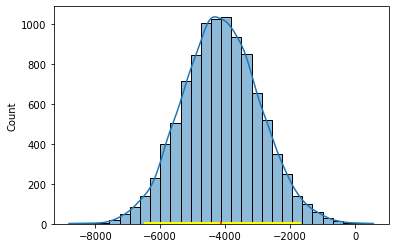

In [40]:

print(len(bootstrap_statistics))
plt.plot([LL, UU], [0, 0], color="yellow", lw=5)
plt.plot([mean_difference, mean_difference], [0, 10], color="red")
sns.histplot(data=bootstrap_statistics, bins=30, kde=True)

In [ ]:
print(f"""
El valor estimado por remuestreo con reemplazo es ${mean_difference:,.2f}.
Con un intervalo de confianza de bootstrap de [${LL:,.2f}, {UU:,.2f}] al 95 %.
""")